<a href="https://colab.research.google.com/github/BrunoRammon/gato-cachorro_classificacao_de_racas/blob/main/building_processed_databases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd '/content/drive/My Drive/Programming/Data Science/PES-IMD/Aprendizado de Máquina/Trabalho/Trab_AM/'

/content/drive/My Drive/Programming/Data Science/PES-IMD/Aprendizado de Máquina/Trabalho/Trab_AM


In [3]:
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.feature import hog
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
import glob
import numpy as np
import PIL
import csv 
import pandas as pd

In [ ]:
names = ['german_shorthaired','newfoundland','saint_bernard', 'Maine_Coon', 'Siamese']
sample_sizes = [200,200,200,200,200]

this_absolute_path = '/content/drive/My Drive/Programming/Data Science/PES-IMD/Aprendizado de Máquina/Trabalho/Trab_AM/'
image_path = './selected_images/'
files_names = dict()
for name in names:  
    pattern = f'{image_path}{name}_*.jpg'
    files_names[name] = glob.glob(pattern)
    print(f'There is {len(files_names[name])} images of {name}.')

There is 200 images of german_shorthaired.
There is 200 images of newfoundland.
There is 200 images of saint_bernard.
There is 200 images of Maine_Coon.
There is 200 images of Siamese.


In [ ]:
img = PIL.Image.open(image_absolute_path+'german_shorthaired_6.jpg')
imgarr = np.array(img)
imgarr.shape

(500, 334, 3)

In [ ]:
resized_img = resize(imgarr,(128,128))
resized_img.shape

(128, 128, 3)

In [ ]:
#fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(16, 16),cells_per_block=(2, 2), visualize=True, channel_axis=-1)# lateste sk-image versions 
fd_1764, hog_image_1764 = hog(resized_img, orientations=9, 
                              pixels_per_cell=(16, 16),
                              cells_per_block=(2, 2), 
                              visualize=True, multichannel=True, )
fd_1764.shape

(1764,)

Why 1764? Because the resized image has 128x128 pixels. And one block is composed by 2x2 (4) cells and each cell has 16x16 (256) pixels. The hog algorithm is applied to a cell resulting in a vector of length equal to 9 for each cell. Therefore, nine corresponds to the number of directions considered to compute the histogram of directional derivatives in each cell. As 1 block is composed by 4 cells, each cell 9-vector is aggregated resulting in one 9-vector per each block.

In [ ]:
#fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(20,20),cells_per_block=(2, 2), visualize=True, channel_axis=-1)# lateste sk-image versions 
fd_900, hog_image_900 = hog(resized_img, orientations=9, pixels_per_cell=(20,20),cells_per_block=(2, 2), visualize=True, multichannel=True)

(128, 128)


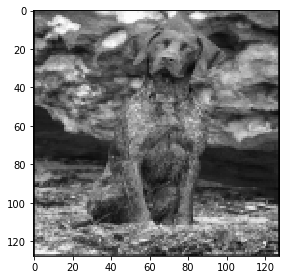

In [ ]:
grayscale = rgb2gray(resized_img)
imshow(grayscale) 
print(grayscale.shape)

In [ ]:
fd_gray, hog_image_gray = hog(grayscale, orientations=9, pixels_per_cell=(16, 16),cells_per_block=(2, 2), visualize=True, multichannel=False)
fd_gray.shape

(1764,)

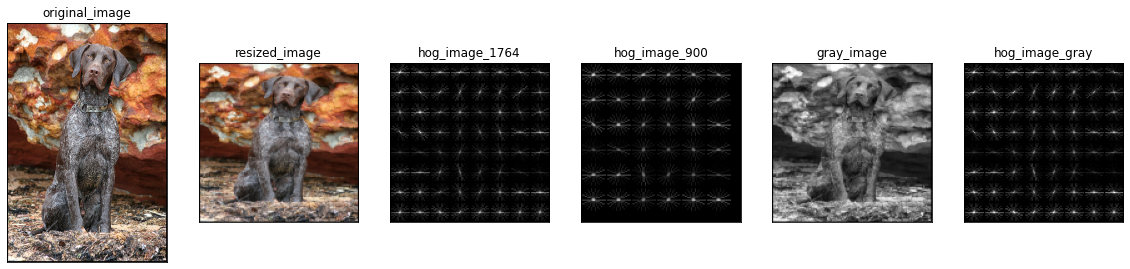

In [ ]:
fig, ax = plt.subplots(1,6)
fig.set_size_inches(20,15)
# remove ticks and their labels
[a.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False) 
    for a in ax]
 
ax[0].imshow(img)
ax[0].set_title('original_image')
ax[1].imshow(resized_img)
ax[1].set_title('resized_image')
ax[2].imshow(hog_image_1764,cmap='gray')
ax[2].set_title('hog_image_1764')
ax[3].imshow(hog_image_900,cmap='gray')
ax[3].set_title('hog_image_900')
ax[4].imshow(grayscale,cmap='gray')
ax[4].set_title('gray_image')
ax[5].imshow(hog_image_gray,cmap='gray')
ax[5].set_title('hog_image_gray')
plt.show()

In [ ]:
db_filenames = [this_absolute_path+"td=1764.csv",this_absolute_path+"td=900.csv"]
pixels_per_cell = [16,20]
for filename, n_pixel in zip(db_filenames,pixels_per_cell):
    with open(filename, 'w') as csvfile:
        csvwriter = csv.writer(csvfile)
        for name in names:  
            for file_name in files_names[name]:
                img = PIL.Image.open(file_name)
                imgarr = np.array(img)
        #         imshow(imgarr)
                resized_img = resize(imgarr,(128,128))
        #         imgshow(resized_img)
                fd = hog(resized_img, orientations=9, pixels_per_cell=(n_pixel, n_pixel), 
                            cells_per_block=(2, 2), multichannel=True)
                csvwriter.writerow(fd.tolist()+[name])

In [ ]:
dimensions = [1764,900]
# db_filenames = [this_absolute_path+"td=1764.csv",this_absolute_path+"td=900.csv"]
pixels_per_cell = [16,20]
features = {}
for dimension, n_pixel in zip(dimensions,pixels_per_cell):
    df = pd.DataFrame(columns = [str(i) for i in range(dimension)]+['class'])
    for name in names:  
        for file_name in files_names[name]:
            img = PIL.Image.open(file_name)
            imgarr = np.array(img)
            resized_img = resize(imgarr,(128,128))
            fd = hog(resized_img, orientations=9, pixels_per_cell=(n_pixel, n_pixel), 
                        cells_per_block=(2, 2), multichannel=True)
            df.loc[len(df.index)] = fd.tolist()+[name]
    features['d='+str(dimension)] = df


In [ ]:
features['d=1764']

,0,1,2,3,4,5,6,7,8,9,...,1755,1756,1757,1758,1759,1760,1761,1762,1763,class
0,0.028640,0.018283,0.029171,0.073948,0.301461,0.301461,0.027663,0.028925,0.011029,0.074708,...,0.205284,0.185976,0.192464,0.160559,0.205284,0.178841,0.124227,0.112400,0.120033,german_shorthaired
1,0.214726,0.141497,0.140750,0.223992,0.238010,0.238010,0.204499,0.202935,0.176714,0.109305,...,0.290550,0.068954,0.039178,0.100910,0.290550,0.153505,0.069281,0.048898,0.172041,german_shorthaired
2,0.060010,0.052299,0.112386,0.222698,0.270367,0.242030,0.144337,0.035367,0.022401,0.060106,...,0.085668,0.090618,0.121715,0.223967,0.271444,0.271444,0.271444,0.122127,0.064171,german_shorthaired
3,0.332876,0.208621,0.103348,0.259014,0.098038,0.022423,0.044545,0.052708,0.332876,0.006230,...,0.058202,0.023715,0.041773,0.133672,0.268015,0.115517,0.023865,0.006945,0.017347,german_shorthaired
4,0.009075,0.001101,0.002087,0.037614,0.342370,0.191032,0.004670,0.000773,0.000000,0.007916,...,0.195199,0.032566,0.036337,0.017333,0.066342,0.040820,0.147184,0.285180,0.285180,german_shorthaired
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.034717,0.016782,0.055038,0.065347,0.334828,0.334828,0.086219,0.033848,0.018906,0.052593,...,0.313009,0.231350,0.313009,0.179517,0.209471,0.148381,0.174546,0.196298,0.313009,Siamese
996,0.119843,0.029347,0.000000,0.003164,0.100462,0.157571,0.120502,0.079436,0.349412,0.015371,...,0.250536,0.214644,0.250536,0.202025,0.240743,0.147673,0.250536,0.250536,0.250536,Siamese
997,0.078784,0.084426,0.065183,0.186308,0.258688,0.146304,0.096925,0.124231,0.065613,0.258688,...,0.049193,0.060740,0.081229,0.149827,0.288850,0.149571,0.169412,0.075471,0.057788,Siamese
998,0.137684,0.051965,0.050137,0.046322,0.094935,0.022306,0.072485,0.079711,0.098635,0.225529,...,0.255332,0.255332,0.255332,0.244831,0.195201,0.077207,0.131827,0.102640,0.146375,Siamese


In [ ]:
features['d=900']

,0,1,2,3,4,5,6,7,8,9,...,891,892,893,894,895,896,897,898,899,class
0,0.109014,0.076235,0.076498,0.133731,0.330878,0.330878,0.090964,0.136307,0.063216,0.085564,...,0.124647,0.201657,0.185646,0.175590,0.201657,0.201657,0.198924,0.171822,0.144948,german_shorthaired
1,0.175754,0.146870,0.179680,0.222639,0.244227,0.244227,0.244227,0.232451,0.172464,0.088229,...,0.050535,0.046448,0.091979,0.216337,0.255185,0.214234,0.093638,0.035408,0.048363,german_shorthaired
2,0.056318,0.042170,0.102166,0.217575,0.261892,0.261892,0.100534,0.046705,0.020869,0.055726,...,0.026252,0.027352,0.052256,0.102832,0.262763,0.262763,0.142727,0.044981,0.030934,german_shorthaired
3,0.347977,0.187380,0.096183,0.265960,0.347977,0.142732,0.066029,0.078620,0.347977,0.009451,...,0.173089,0.034973,0.018499,0.021579,0.253048,0.054687,0.017641,0.045533,0.158772,german_shorthaired
4,0.010009,0.003021,0.003531,0.031799,0.307337,0.145980,0.006972,0.005750,0.003351,0.004799,...,0.231708,0.041827,0.020092,0.035535,0.028248,0.070165,0.204670,0.289463,0.289463,german_shorthaired
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.027825,0.014312,0.060208,0.071189,0.287031,0.287031,0.128560,0.042817,0.016639,0.080834,...,0.090971,0.071501,0.214494,0.192947,0.069964,0.046073,0.030193,0.091373,0.258643,Siamese
996,0.072623,0.017921,0.000363,0.036383,0.288485,0.288485,0.151803,0.057437,0.217082,0.006165,...,0.197787,0.170672,0.083968,0.110150,0.105978,0.121331,0.256584,0.256584,0.216708,Siamese
997,0.041272,0.045068,0.039927,0.104817,0.176955,0.112725,0.076079,0.069032,0.031321,0.190456,...,0.030873,0.060899,0.072731,0.119118,0.201536,0.128772,0.049694,0.022035,0.038301,Siamese
998,0.104176,0.058563,0.052440,0.039238,0.070123,0.020340,0.052893,0.059429,0.069886,0.176019,...,0.079078,0.095120,0.122836,0.083396,0.123292,0.239362,0.239362,0.138001,0.102455,Siamese


# Dataset with dimension $d = 1764$



## Normal data set

In [ ]:
#getting the attributes of each instances
index_list_column = [str(x) for x in range(1764)]
df = features['d=1764']
df = df.sample(frac = 1)
df.reset_index(inplace=True,drop=True)
df

,0,1,2,3,4,5,6,7,8,9,...,1755,1756,1757,1758,1759,1760,1761,1762,1763,class
0,0.095228,0.042785,0.017290,0.031763,0.130629,0.062424,0.060523,0.028910,0.061869,0.038059,...,0.150408,0.059510,0.033640,0.041083,0.165689,0.119024,0.168886,0.238597,0.149451,Siamese
1,0.257032,0.053806,0.031230,0.054551,0.069945,0.115728,0.048681,0.089079,0.257032,0.257032,...,0.153368,0.149986,0.157393,0.122368,0.180098,0.112731,0.106198,0.109054,0.116417,saint_bernard
2,0.314930,0.084942,0.180132,0.314930,0.305240,0.060711,0.045053,0.039871,0.314930,0.059990,...,0.132140,0.098786,0.067210,0.219063,0.266832,0.266832,0.208498,0.155424,0.112825,saint_bernard
3,0.021520,0.009886,0.013579,0.040766,0.174436,0.018647,0.014005,0.006240,0.005891,0.069159,...,0.237774,0.076969,0.121511,0.045519,0.070356,0.113023,0.137778,0.282801,0.282801,newfoundland
4,0.085797,0.036378,0.197946,0.293580,0.293580,0.167460,0.054820,0.040477,0.019714,0.094901,...,0.225394,0.149285,0.162387,0.086350,0.225394,0.125314,0.132527,0.121205,0.127279,saint_bernard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.350735,0.024872,0.007453,0.025595,0.011644,0.065674,0.016182,0.054517,0.350735,0.350735,...,0.237474,0.017599,0.004464,0.004496,0.009340,0.008288,0.009980,0.023923,0.197071,Maine_Coon
996,0.288476,0.288476,0.137479,0.058860,0.065091,0.044932,0.097549,0.105088,0.288476,0.119831,...,0.168143,0.032125,0.016452,0.000000,0.074825,0.124231,0.230723,0.078273,0.032808,Siamese
997,0.275720,0.218395,0.106303,0.116731,0.059083,0.062840,0.187992,0.275720,0.275720,0.209244,...,0.242322,0.094056,0.242322,0.105672,0.101728,0.081474,0.150919,0.142644,0.142432,newfoundland
998,0.028966,0.041485,0.038193,0.032875,0.324640,0.367919,0.034065,0.044439,0.021430,0.016557,...,0.211983,0.067334,0.031603,0.066979,0.271252,0.271252,0.172864,0.099942,0.038455,Siamese


In [ ]:
X = df[index_list_column]
X

,0,1,2,3,4,5,6,7,8,9,...,1754,1755,1756,1757,1758,1759,1760,1761,1762,1763
0,0.095228,0.042785,0.017290,0.031763,0.130629,0.062424,0.060523,0.028910,0.061869,0.038059,...,0.238597,0.150408,0.059510,0.033640,0.041083,0.165689,0.119024,0.168886,0.238597,0.149451
1,0.257032,0.053806,0.031230,0.054551,0.069945,0.115728,0.048681,0.089079,0.257032,0.257032,...,0.188117,0.153368,0.149986,0.157393,0.122368,0.180098,0.112731,0.106198,0.109054,0.116417
2,0.314930,0.084942,0.180132,0.314930,0.305240,0.060711,0.045053,0.039871,0.314930,0.059990,...,0.128270,0.132140,0.098786,0.067210,0.219063,0.266832,0.266832,0.208498,0.155424,0.112825
3,0.021520,0.009886,0.013579,0.040766,0.174436,0.018647,0.014005,0.006240,0.005891,0.069159,...,0.281954,0.237774,0.076969,0.121511,0.045519,0.070356,0.113023,0.137778,0.282801,0.282801
4,0.085797,0.036378,0.197946,0.293580,0.293580,0.167460,0.054820,0.040477,0.019714,0.094901,...,0.126348,0.225394,0.149285,0.162387,0.086350,0.225394,0.125314,0.132527,0.121205,0.127279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.350735,0.024872,0.007453,0.025595,0.011644,0.065674,0.016182,0.054517,0.350735,0.350735,...,0.331385,0.237474,0.017599,0.004464,0.004496,0.009340,0.008288,0.009980,0.023923,0.197071
996,0.288476,0.288476,0.137479,0.058860,0.065091,0.044932,0.097549,0.105088,0.288476,0.119831,...,0.256641,0.168143,0.032125,0.016452,0.000000,0.074825,0.124231,0.230723,0.078273,0.032808
997,0.275720,0.218395,0.106303,0.116731,0.059083,0.062840,0.187992,0.275720,0.275720,0.209244,...,0.117833,0.242322,0.094056,0.242322,0.105672,0.101728,0.081474,0.150919,0.142644,0.142432
998,0.028966,0.041485,0.038193,0.032875,0.324640,0.367919,0.034065,0.044439,0.021430,0.016557,...,0.110100,0.211983,0.067334,0.031603,0.066979,0.271252,0.271252,0.172864,0.099942,0.038455


In [ ]:
df.to_csv(this_absolute_path+'dataset_normal_d=1764.csv',index=False)

## PCA dataset

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#Normalizing data
sc = StandardScaler()
X_norm = sc.fit_transform(X)

#Applying PCA on the training and test data
pca = PCA()
X_pca = pca.fit_transform(X_norm)

#Selecting number of attributes
count_components = 0
acc = 0.0
while acc < 0.98:
    acc += pca.explained_variance_ratio_[count_components]
    count_components += 1
print(f'The number of components in the analysis is {count_components}')
df_pca = pd.DataFrame(X_pca[:,:count_components])
df_pca['class'] = df['class']
df_pca

The number of components in the analysis is 459


,0,1,2,3,4,5,6,7,8,9,...,450,451,452,453,454,455,456,457,458,class
0,2.340230,9.030254,-14.447798,-0.409498,-4.494565,11.992915,-9.219723,5.746131,6.920244,-4.799671,...,-0.174997,0.649772,-0.104697,0.399121,0.298478,0.435007,0.720271,-0.428740,-0.193784,Siamese
1,-3.830978,-1.486229,1.763685,-4.210069,0.854460,7.776421,6.016498,2.832882,-1.801499,6.513379,...,-0.260406,-0.779951,0.451770,-0.712430,0.385950,0.038641,-0.742914,-0.336549,-0.822823,saint_bernard
2,-1.281111,-0.706481,4.312775,2.414585,-4.068180,3.487273,-0.392547,-1.267117,5.590146,-5.950481,...,-0.189274,0.182623,0.942341,0.103709,-0.128866,0.677023,-0.442574,0.083784,0.328076,saint_bernard
3,-13.441115,-0.599209,5.294044,-6.620069,-10.196937,-7.196035,2.791527,-3.613278,-1.142419,0.581941,...,1.194514,-0.228177,0.019069,0.518921,0.137807,0.107723,-0.845472,1.245619,0.853569,newfoundland
4,27.386749,-2.693212,1.848515,-3.542382,2.942895,-4.327945,-1.688086,-0.677015,-2.867130,-2.711429,...,-0.177275,-0.804210,-0.232861,-0.216794,0.274034,-0.723425,-0.486814,-0.517159,0.017904,saint_bernard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-20.776012,27.151792,-3.034550,5.125415,5.305297,8.481908,-1.202342,6.831471,0.363862,-4.422189,...,0.514720,0.697665,-0.708280,0.065090,-0.018909,1.000803,-0.397984,-0.005029,-0.218075,Maine_Coon
996,-17.461817,0.915279,0.442731,-2.717918,3.214746,1.942782,0.203205,14.753700,6.785123,-1.177534,...,-0.598635,-0.532905,-0.056363,0.153213,-0.541791,0.149627,-0.487856,-0.164929,0.059937,Siamese
997,-5.161999,-8.581747,2.482409,2.748945,-0.448512,7.075015,4.612471,-2.679350,-0.181154,-3.515946,...,0.232391,0.621895,-0.136834,0.079952,-0.809514,-0.960621,0.516813,-0.255933,0.356922,newfoundland
998,17.243768,4.796173,-9.033393,3.280559,1.140297,7.417966,-1.011432,-4.972364,5.486207,2.801416,...,-0.066875,-0.899350,0.704304,-0.363888,0.989940,-0.167149,0.297317,-0.130904,-0.447979,Siamese


In [ ]:
df_pca.to_csv(this_absolute_path+f'dataset_pca_d={count_components}.csv',index=False)

## Correlation dataset

In [ ]:
# def correlation(data_set)

def correlation(dataset,threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X,0.7)

In [ ]:
X_noncorr = X.drop(corr_features, axis = 1)
d_noncorr = X_noncorr.shape[1]
print(f'Dimension = {d_noncorr}')
df_noncorr = X_noncorr.copy()
df_noncorr['class'] = df['class']
df_noncorr.rename(columns={v:idx for idx,v in enumerate(df_noncorr.columns[:d_noncorr])},inplace=True)
df_noncorr

Dimension = 540


,0,1,2,3,4,5,6,7,8,9,...,531,532,533,534,535,536,537,538,539,class
0,0.095228,0.042785,0.017290,0.031763,0.130629,0.062424,0.060523,0.028910,0.038059,0.029125,...,0.259473,0.150408,0.059510,0.033640,0.041083,0.165689,0.119024,0.168886,0.238597,Siamese
1,0.257032,0.053806,0.031230,0.054551,0.069945,0.115728,0.048681,0.089079,0.257032,0.115527,...,0.054938,0.153368,0.149986,0.157393,0.122368,0.180098,0.112731,0.106198,0.109054,saint_bernard
2,0.314930,0.084942,0.180132,0.314930,0.305240,0.060711,0.045053,0.039871,0.059990,0.047584,...,0.051057,0.132140,0.098786,0.067210,0.219063,0.266832,0.266832,0.208498,0.155424,saint_bernard
3,0.021520,0.009886,0.013579,0.040766,0.174436,0.018647,0.014005,0.006240,0.069159,0.279788,...,0.063732,0.237774,0.076969,0.121511,0.045519,0.070356,0.113023,0.137778,0.282801,newfoundland
4,0.085797,0.036378,0.197946,0.293580,0.293580,0.167460,0.054820,0.040477,0.094901,0.038943,...,0.116686,0.225394,0.149285,0.162387,0.086350,0.225394,0.125314,0.132527,0.121205,saint_bernard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.350735,0.024872,0.007453,0.025595,0.011644,0.065674,0.016182,0.054517,0.350735,0.037322,...,0.019653,0.237474,0.017599,0.004464,0.004496,0.009340,0.008288,0.009980,0.023923,Maine_Coon
996,0.288476,0.288476,0.137479,0.058860,0.065091,0.044932,0.097549,0.105088,0.119831,0.114579,...,0.180131,0.168143,0.032125,0.016452,0.000000,0.074825,0.124231,0.230723,0.078273,Siamese
997,0.275720,0.218395,0.106303,0.116731,0.059083,0.062840,0.187992,0.275720,0.209244,0.075364,...,0.155592,0.242322,0.094056,0.242322,0.105672,0.101728,0.081474,0.150919,0.142644,newfoundland
998,0.028966,0.041485,0.038193,0.032875,0.324640,0.367919,0.034065,0.044439,0.016557,0.035442,...,0.266705,0.211983,0.067334,0.031603,0.066979,0.271252,0.271252,0.172864,0.099942,Siamese


In [ ]:
df_noncorr.to_csv(this_absolute_path+f'dataset_noncorr_d={d_noncorr}.csv',index=False)

## Correlation + PCA dataset

In [ ]:
#Normalizing data
sc = StandardScaler()
X_norm = sc.fit_transform(X_noncorr)

#Applying PCA on the training and test data
pca = PCA()
X_noncorr_pca = pca.fit_transform(X_norm)

#Selecting number of attributes
count_components = 0
acc = 0.0
while acc < 0.98:
    acc += pca.explained_variance_ratio_[count_components]
    count_components += 1
print(f'The number of components in the analysis is {count_components}')
df_noncorr_pca = pd.DataFrame(X_noncorr_pca[:,:count_components])
df_noncorr_pca['class'] = df['class']
df_noncorr_pca

The number of components in the analysis is 387


,0,1,2,3,4,5,6,7,8,9,...,378,379,380,381,382,383,384,385,386,class
0,-0.456643,4.243195,-6.701636,-4.164199,0.887037,6.362087,-4.141817,-0.825855,4.903562,-0.733963,...,0.143766,0.492360,0.194628,-0.153637,-0.175516,0.490222,0.382503,0.221312,-0.171062,Siamese
1,3.255865,-0.688728,1.121547,-2.259290,0.546442,2.998107,1.232300,2.554920,-1.869426,0.809459,...,0.216962,0.010019,-0.247493,0.074423,-0.352048,0.246877,0.058683,-0.223132,-0.149486,saint_bernard
2,-0.826945,-0.599107,2.213449,2.006005,1.754706,2.705875,-0.012523,0.255562,-2.100786,-1.562892,...,-0.046686,0.131746,-0.076768,-0.370818,-0.308588,0.517441,0.026949,-0.633923,0.048706,saint_bernard
3,5.048357,-1.753619,4.575221,0.615169,6.444822,0.303760,5.378828,-1.807413,-1.022537,-1.201083,...,-0.540076,-0.515140,0.355576,-0.122120,-0.282423,0.590825,0.316430,-0.455803,-0.503490,newfoundland
4,-14.575023,0.340453,1.232512,-2.145829,-0.049997,-2.857713,-1.347172,-0.532371,-1.579843,2.216692,...,-0.055403,-0.743235,0.252042,0.369646,0.245838,0.124459,-0.243090,-0.364642,-0.402373,saint_bernard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,15.714661,12.732099,-0.411465,-1.056329,-3.591097,3.667371,-3.381473,3.685325,0.307831,0.583837,...,0.348599,-0.587821,-0.388988,0.282882,0.182272,0.158940,0.330921,0.205367,0.437432,Maine_Coon
996,9.470921,0.009850,1.103693,-2.269910,-2.171866,0.878705,0.388629,4.451352,6.326586,1.330490,...,-0.209831,0.368848,-0.176270,-0.174445,0.188282,0.261504,-0.305944,0.730302,0.108057,Siamese
997,1.145493,-5.028868,0.022824,3.087094,-1.783693,4.549636,0.595550,0.575281,-1.900175,-1.447605,...,-0.969641,0.115864,0.354552,-0.195094,-0.032861,-0.528543,-0.344826,0.424437,0.396962,newfoundland
998,-6.465885,7.082476,-8.269498,-0.389092,-4.846729,4.763764,0.939293,-1.849065,1.136022,4.976037,...,0.438160,0.015134,-0.422299,0.405708,-0.310863,-0.549088,-0.399778,-0.197215,0.537365,Siamese


In [ ]:
df_noncorr_pca.to_csv(this_absolute_path+f'dataset_noncorr_pca_d={count_components}.csv',index=False)

# Dataset with dimension $d = 900$



## Normal data set

In [ ]:
#getting the attributes of each instances
d = 900
index_list_column = [str(x) for x in range(d)]
df = features[f'd={d}']
df = df.sample(frac = 1)
df.reset_index(inplace=True,drop=True)
df

,0,1,2,3,4,5,6,7,8,9,...,891,892,893,894,895,896,897,898,899,class
0,0.007306,0.004849,0.010392,0.043624,0.481523,0.040510,0.018601,0.013452,0.006374,0.011797,...,0.131556,0.091208,0.049904,0.034830,0.083562,0.255085,0.237524,0.157610,0.255085,newfoundland
1,0.258085,0.076309,0.067015,0.052315,0.242628,0.093082,0.099456,0.173174,0.258085,0.258085,...,0.139397,0.037398,0.018253,0.031419,0.077416,0.078708,0.076713,0.281711,0.179106,saint_bernard
2,0.216711,0.191620,0.138444,0.163484,0.216711,0.183030,0.195932,0.109604,0.166050,0.178830,...,0.038619,0.062402,0.059851,0.126900,0.376849,0.030464,0.029755,0.020879,0.011714,Siamese
3,0.206196,0.094642,0.080683,0.141976,0.232949,0.132763,0.178615,0.100083,0.150991,0.100739,...,0.145755,0.194930,0.160121,0.172620,0.141515,0.132950,0.202317,0.163340,0.162741,german_shorthaired
4,0.080855,0.059893,0.087327,0.157262,0.259507,0.225898,0.125411,0.076115,0.038907,0.193273,...,0.176585,0.127141,0.145109,0.137692,0.159530,0.120885,0.147116,0.149126,0.115289,saint_bernard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.303815,0.303815,0.303815,0.094743,0.097052,0.044761,0.015792,0.034509,0.094295,0.303815,...,0.139290,0.126572,0.099582,0.082158,0.284369,0.284369,0.206205,0.112459,0.123730,Siamese
996,0.304068,0.017580,0.019157,0.010647,0.014371,0.011005,0.009798,0.034632,0.304068,0.088261,...,0.248563,0.275322,0.275322,0.194930,0.275322,0.087178,0.061262,0.074877,0.094985,german_shorthaired
997,0.139834,0.099746,0.087885,0.186191,0.263544,0.054010,0.019636,0.011852,0.044720,0.382321,...,0.319055,0.152307,0.104701,0.040153,0.040691,0.051835,0.082900,0.116665,0.245749,Siamese
998,0.228241,0.062183,0.056481,0.131197,0.223424,0.188514,0.086352,0.121794,0.151735,0.319069,...,0.134153,0.183005,0.146966,0.077696,0.054309,0.077451,0.057657,0.087896,0.078093,Maine_Coon


In [ ]:
X = df[index_list_column]
X

,0,1,2,3,4,5,6,7,8,9,...,890,891,892,893,894,895,896,897,898,899
0,0.007306,0.004849,0.010392,0.043624,0.481523,0.040510,0.018601,0.013452,0.006374,0.011797,...,0.152210,0.131556,0.091208,0.049904,0.034830,0.083562,0.255085,0.237524,0.157610,0.255085
1,0.258085,0.076309,0.067015,0.052315,0.242628,0.093082,0.099456,0.173174,0.258085,0.258085,...,0.206519,0.139397,0.037398,0.018253,0.031419,0.077416,0.078708,0.076713,0.281711,0.179106
2,0.216711,0.191620,0.138444,0.163484,0.216711,0.183030,0.195932,0.109604,0.166050,0.178830,...,0.045025,0.038619,0.062402,0.059851,0.126900,0.376849,0.030464,0.029755,0.020879,0.011714
3,0.206196,0.094642,0.080683,0.141976,0.232949,0.132763,0.178615,0.100083,0.150991,0.100739,...,0.159581,0.145755,0.194930,0.160121,0.172620,0.141515,0.132950,0.202317,0.163340,0.162741
4,0.080855,0.059893,0.087327,0.157262,0.259507,0.225898,0.125411,0.076115,0.038907,0.193273,...,0.235266,0.176585,0.127141,0.145109,0.137692,0.159530,0.120885,0.147116,0.149126,0.115289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.303815,0.303815,0.303815,0.094743,0.097052,0.044761,0.015792,0.034509,0.094295,0.303815,...,0.109605,0.139290,0.126572,0.099582,0.082158,0.284369,0.284369,0.206205,0.112459,0.123730
996,0.304068,0.017580,0.019157,0.010647,0.014371,0.011005,0.009798,0.034632,0.304068,0.088261,...,0.033225,0.248563,0.275322,0.275322,0.194930,0.275322,0.087178,0.061262,0.074877,0.094985
997,0.139834,0.099746,0.087885,0.186191,0.263544,0.054010,0.019636,0.011852,0.044720,0.382321,...,0.131707,0.319055,0.152307,0.104701,0.040153,0.040691,0.051835,0.082900,0.116665,0.245749
998,0.228241,0.062183,0.056481,0.131197,0.223424,0.188514,0.086352,0.121794,0.151735,0.319069,...,0.261620,0.134153,0.183005,0.146966,0.077696,0.054309,0.077451,0.057657,0.087896,0.078093


In [ ]:
df.to_csv(this_absolute_path+f'dataset_normal_d={d}.csv',index=False)

#Ploting 

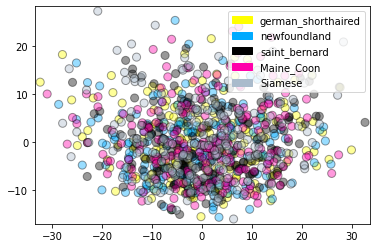

In [ ]:
# from adspy_shared_utilities import plot_labelled_scatter
import numpy
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
from sklearn import neighbors
import matplotlib.patches as mpatches
import graphviz
from sklearn.tree import export_graphviz
import matplotlib.patches as mpatches

def plot_labelled_scatter(X, y, class_labels):
    num_labels = len(class_labels)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    marker_array = ['o', '^', '*']
    color_array = ['#FFFF00', '#00AAFF', '#000000', '#FF00AA','#aabbcc']
    cmap_bold = ListedColormap(color_array)
    bnorm = BoundaryNorm(numpy.arange(0, num_labels + 1, 1), ncolors=num_labels)
    plt.figure()

    plt.scatter(X[:, 0], X[:, 1], s=65, c=y, cmap=cmap_bold, norm = bnorm, alpha = 0.40, edgecolor='black', lw = 1)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    h = []
    for c in range(0, num_labels):
        h.append(mpatches.Patch(color=color_array[c], label=class_labels[c]))
    plt.legend(handles=h)

    plt.show()

plot_labelled_scatter(X_pca,y_num_classes_5,classes_5)